In [1]:
import cv2 # importing OpenCV
import numpy as np # importing Numpy in order to work with arrays
import matplotlib.pyplot as plt # importing matplotlib.pyplot to display arrays directly



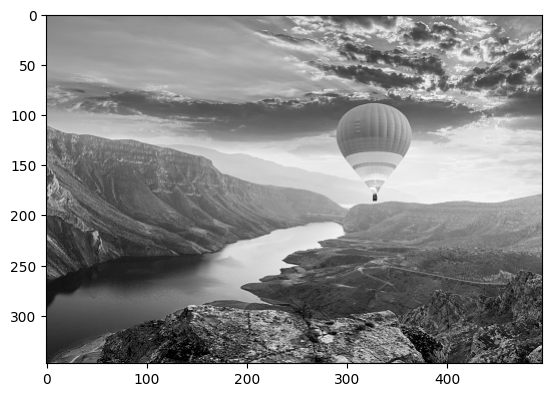

In [2]:
IMG_PATH = '../picture.jpg'
img = cv2.imread(IMG_PATH)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)




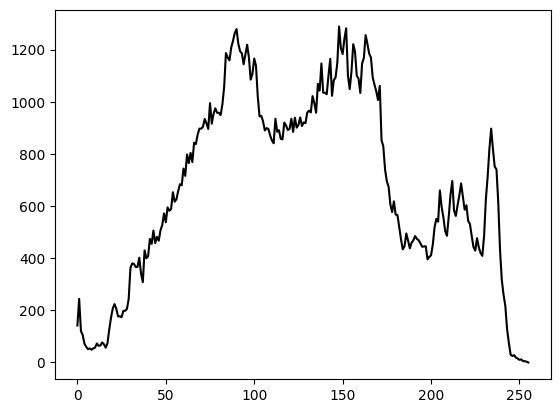

In [3]:
histogram = cv2.calcHist([img_gray], [0], None, [256], [0, 256])


plt.plot(histogram, color='k')
plt.show()


1.0000000007621566

In [25]:
def get_uk(k):
    uk = 0
    index = 0
    for i in probabilityForEachLevel:
        if index < k:
            uk += i * index
        index+=1
    return uk

def get_wk(k):
    wk = 0.0
    index = 0
    for pi in probabilityForEachLevel:
        wk += pi
        if index == k:
            break
        index+=1
    return wk

def get_w0():
    k = 128
    w0 = get_wk(k)
    return w0

def get_w1():
    k = 128
    w0 = get_wk(k)
    return 1 - w0

def get_ut():
    ut = 0
    index = 0
    for i in probabilityForEachLevel:
        ut += i * index
        index += 1
    return ut
def get_u0():
    k = 128
    return  get_uk(k) / get_wk(k)

def get_u1():
    return get_ut() - get_u0()

def get_var_0():
    k = 128
    sumOf_I_Sub_u0_squared_mltply_pi = 0
    index = 0
    for pi in probabilityForEachLevel:
        if index == k:
            break
        sumOf_I_Sub_u0_squared_mltply_pi += (index - u0)**2 * pi
        index+=1

    return sumOf_I_Sub_u0_squared_mltply_pi / w0 # variance 0


def get_var_1():
    k = 256
    sumOf_I_Sub_u1_squared_mltply_pi = 0
    index = 128
    for pi in probabilityForEachLevel:
        if index == k:
            break
        sumOf_I_Sub_u1_squared_mltply_pi += (index - u1)**2 * pi
        index+=1

    return sumOf_I_Sub_u1_squared_mltply_pi / w1 # variance 0


def get_var_b():
    var_b = get_w0() * get_w1() * (get_u1() - get_u0()) ** 2
    return var_b
    var_w = w0 * var_0 + w1 * var_1
    var_b = w0 * w1 * (u1 - u0)**2

def get_var_w():
    var_w = get_w0() * get_var_0() + get_w1() * get_var_1()
    return var_w

def get_var_t():
    return get_var_b() + get_var_w()

def getLyambda():
    return get_var_b() / get_var_w()

def getK():
    return get_var_t() / get_var_w()

def getN():
    return get_var_b() / get_var_t()

#Equation 18
def get_between_class_variance(k):
    return ((get_ut() * get_wk(k) - get_uk(k)) ** 2) / (get_wk(k) * (1 - get_wk(k)))


In [26]:
# Equation(1)
numberOfPixelsForEachLevel = histogram.ravel()
sumOfPixels = img_gray.size
probabilityForEachLevel = histogram.ravel()/histogram.sum()
probabilityForEachLevel 

#To prove that the sum is equal to 1
sum = 0
for i in probabilityForEachLevel:
    sum += i

print("sum of probability check = " + str(sum))   # sum of Pi (1)

# two classes with 
C0LevelArray = list(range(0, 128))
C1LevelArray = list(range(128, 256))

# Equation(2,3)
w0 = 0 # probability of class occurence C0
w1 = 0 # probablitiy of class occurence C1
index = 0
for i in probabilityForEachLevel:
    if index < 128:
        w0 += i
    else:
        w1 += i
    index+=1

    
# Equation 6,7,8
wk = w0 # probabiliti of class occurrence C0 
uk = 0 # mean level of class C1
ut = 0
index = 0
for i in probabilityForEachLevel:
    if index < 128:
        uk += i * index
    ut += i * index
    index+=1
    

# Equation 4,5
u0 = uk / wk
u1 = (ut - uk) / (1 - wk)
print("w0= " + str(w0) + " w1= " + str(w1))
print("u0= " + str(u0) + " u1= " + str(u1))



#Equation 9
print("w0 * u0 + w1 * u1 = " + str(w0 * u0 + w1 * u1) +  " is equal to ut = " + str(ut))


#Equation 10,11 (variance)

sumOf_I_Sub_u0_squared_mltply_pi = 0
sumOf_I_Sub_u1_squared_mltply_pi = 0
index = 0
for pi in probabilityForEachLevel:
    if index < 128:
        sumOf_I_Sub_u0_squared_mltply_pi += (index - u0)**2 * pi
    else:
        sumOf_I_Sub_u1_squared_mltply_pi += (index - u1)**2 * pi
    index+=1

var_0 = sumOf_I_Sub_u0_squared_mltply_pi / w0 # variance 0
var_1 = sumOf_I_Sub_u1_squared_mltply_pi / w1 # variance 1

print("variance 0= " + str(var_0) + " variance 1= " + str(var_1))


#Equation 13,14
var_w = w0 * var_0 + w1 * var_1
var_b = w0 * w1 * (u1 - u0)**2

print("within-class variance var_w= " + str(var_w) + " between-class variance var_w= " + str(var_b))

# Equation 15
sumOf_I_Sub_ut_squared_mltply_pi = 0
index = 0
for pi in probabilityForEachLevel:
    sumOf_I_Sub_ut_squared_mltply_pi += (index - ut) ** 2 * pi
    index += 1
var_t = sumOf_I_Sub_ut_squared_mltply_pi
print("total variance var_t= " + str(var_t))


# Equation 12
# levels of goodness (lyambda, k, n)
lyambda = var_b / var_w
k = var_t / var_w
n = var_b / var_t
print("lyambda= " + str(lyambda) + " k= " + str(k) + " n= " + str(n))


#Equation 16
print("within-class and between-class sum= " + str(var_b + var_w) + " is equal to total variance= " + str(var_t) )



#Equation 19
max_variance = -1
index = 0
#Find optimal threshold
for i in probabilityForEachLevel:
    if max_variance < get_between_class_variance(index):
        max_variance = get_between_class_variance(index)
    index+=1
    
print("maximum variance= " + str(max_variance)) 


#Equation 20
k = 50
nk = get_between_class_variance(k) / var_t
print("nk= " + str(nk))

sum of probability check = 1.0000000007621566
w0= 0.4923719967191573 w1= 0.5076280040429992
u0= 82.00779336784466 u1= 175.62796780168514
w0 * u0 + w1 * u1 = 129.53201571635532 is equal to ut = 129.5320155824993
variance 0= 805.5836859967842 variance 1= 1088.8376204844458
within-class variance var_w= 949.3713160120632 between-class variance var_w= 2190.6742797497864
total variance var_t= 3140.0455817517723
lyambda= 2.3074999663482045 k= 3.3074999515909886 n= 0.6976568405505917
within-class and between-class sum= 3140.0455957618497 is equal to total variance= 3140.0455817517723
maximum variance= 2350.0745352313925
nk= 0.24663996271106636
